In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as skl
#from sklearn.linear_model import LinearRegression
#from sklearn.datasets import make_blobs
import warnings

warnings.filterwarnings('ignore')



In [2]:
# import in csv and name columns

# OBS.     Index Value
# TOWN     Town Name 
# TOWN#    Town Number 
# TRACT    ??????? 
# LON      Longatude
# LAT      Latitude

# MEDV - Median value of owner-occupied homes in $10000's
# CMEDV - ??????????????

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population


In [3]:
file = 'Resources/bost_housing_augmented.csv'
boston_data = pd.read_csv(file)
boston_data.head()

OBS.        TOWN  TOWN#  TRACT     LON      LAT  MEDV  CMEDV     CRIM  \
0     1      Nahant      0   2011 -70.955  42.2550  24.0   24.0  0.00632   
1     2  Swampscott      1   2021 -70.950  42.2875  21.6   21.6  0.02731   
2     3  Swampscott      1   2022 -70.936  42.2830  34.7   34.7  0.02729   
3     4  Marblehead      2   2031 -70.928  42.2930  33.4   33.4  0.03237   
4     5  Marblehead      2   2032 -70.922  42.2980  36.2   36.2  0.06905   

     ZN  ...  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  18.0  ...     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1   0.0  ...     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2   0.0  ...     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3   0.0  ...     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4   0.0  ...     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  

[5 rows x 21 columns]

In [4]:
# Update MEDV and CMEDV column by a factor of 1000

boston_data['MEDV'] = boston_data['MEDV'] * 1000
boston_data['CMEDV'] = boston_data['CMEDV'] * 1000

boston_data.head()

OBS.        TOWN  TOWN#  TRACT     LON      LAT     MEDV    CMEDV     CRIM  \
0     1      Nahant      0   2011 -70.955  42.2550  24000.0  24000.0  0.00632   
1     2  Swampscott      1   2021 -70.950  42.2875  21600.0  21600.0  0.02731   
2     3  Swampscott      1   2022 -70.936  42.2830  34700.0  34700.0  0.02729   
3     4  Marblehead      2   2031 -70.928  42.2930  33400.0  33400.0  0.03237   
4     5  Marblehead      2   2032 -70.922  42.2980  36200.0  36200.0  0.06905   

     ZN  ...  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  18.0  ...     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1   0.0  ...     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2   0.0  ...     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3   0.0  ...     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4   0.0  ...     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  

[5 rows x 21 columns]

In [5]:
#High Level Understanding of data
boston_data.shape

(506, 21)

In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OBS.     506 non-null    int64  
 1   TOWN     506 non-null    object 
 2   TOWN#    506 non-null    int64  
 3   TRACT    506 non-null    int64  
 4   LON      506 non-null    float64
 5   LAT      506 non-null    float64
 6   MEDV     506 non-null    float64
 7   CMEDV    506 non-null    float64
 8   CRIM     506 non-null    float64
 9   ZN       506 non-null    float64
 10  INDUS    506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  NOX      506 non-null    float64
 13  RM       506 non-null    float64
 14  AGE      506 non-null    float64
 15  DIS      506 non-null    float64
 16  RAD      506 non-null    int64  
 17  TAX      506 non-null    int64  
 18  PTRATIO  506 non-null    float64
 19  B        506 non-null    float64
 20  LSTAT    506 non-null    float64
dtypes: float64(14), 

In [7]:
#show keys from data file
#print(boston_data.keys())

In [8]:
#Check for Null Values
boston_data.isnull().sum()

OBS.       0
TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

<AxesSubplot:>

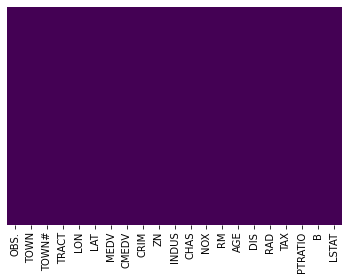

In [9]:
#Visually Check for Null Values
sn.heatmap(boston_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [10]:
#Describe basic statistics for numerical datafields
boston_data.describe().T

count          mean          std         min           25%  \
OBS.     506.0    253.500000   146.213884     1.00000    127.250000   
TOWN#    506.0     47.531621    27.571401     0.00000     26.250000   
TRACT    506.0   2700.355731  1380.036830     1.00000   1303.250000   
LON      506.0    -71.056389     0.075405   -71.28950    -71.093225   
LAT      506.0     42.216440     0.061777    42.03000     42.180775   
MEDV     506.0  22532.806324  9197.104087  5000.00000  17025.000000   
CMEDV    506.0  22528.853755  9182.175882  5000.00000  17025.000000   
CRIM     506.0      3.613524     8.601545     0.00632      0.082045   
ZN       506.0     11.363636    23.322453     0.00000      0.000000   
INDUS    506.0     11.136779     6.860353     0.46000      5.190000   
CHAS     506.0      0.069170     0.253994     0.00000      0.000000   
NOX      506.0      0.554695     0.115878     0.38500      0.449000   
RM       506.0      6.284634     0.702617     3.56100      5.885500   
AGE      506.0     68.574901    28.148861     2.90000     45.025000   
DIS      506.0      3.795043     2.105710     1.12960      2.100175   
RAD      506.0      9.549407     8.707259     1.00000      4.000000   
TAX      506.0    408.237154   168.537116   187.00000    279.000000   
PTRATIO  506.0     18.455534     2.164946    12.60000     17.400000   
B        506.0    356.674032    91.294864     0.32000    375.377500   
LSTAT    506.0     12.653063     7.141062     1.73000      6.950000   

                 50%           75%         max  
OBS.       253.50000    379.750000    506.0000  
TOWN#       42.00000     78.000000     91.0000  
TRACT     3393.50000   3739.750000   5082.0000  
LON        -71.05290    -71.019625    -70.8100  
LAT         42.21810     42.252250     42.3810  
MEDV     21200.00000  25000.000000  50000.0000  
CMEDV    21200.00000  25000.000000  50000.0000  
CRIM         0.25651      3.677083     88.9762  
ZN           0.00000     12.500000    100.0000  
INDUS        9.69000     18.100000     27.7400  
CHAS         0.00000      0.000000      1.0000  
NOX          0.53800      0.624000      0.8710  
RM           6.20850      6.623500      8.7800  
AGE         77.50000     94.075000    100.0000  
DIS          3.20745      5.188425     12.1265  
RAD          5.00000     24.000000     24.0000  
TAX        330.00000    666.000000    711.0000  
PTRATIO     19.05000     20.200000     22.0000  
B          391.44000    396.225000    396.9000  
LSTAT       11.36000     16.955000     37.9700

In [11]:
# Functions Needed for Analysis of individual columns
# Function: Find Outliers INPUT: Column OUTPUT: Array of Outliers
# Function: Analysis Column INPUT: Column OUTPUT: Print Stats to Screen, Call plotchart Function
# Function: Plot Chart INPUT: Column OUTPUT: Print out Boxplot and Distrubtion Plot
#
# Functions pulled from >> https://github.com/atanudan/EDA/blob/main/EDA_City_Data.ipynb <<

## Analysis of continous variables
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

def plotchart(col):
    fix, (ax1,ax2) =plt.subplots(1,2,figsize=(7,5))
    sn.boxplot(col, orient='v',ax=ax1)
    ax1.set_ylabel=col.name
    ax1.set_title('Box plot of {}'.format(col.name))
    sn.distplot(col,ax=ax2) 
    ax2.set_title('Distribution plot of {}'.format(col.name))
    
def analysis_column(col):
    print('count of outlier ', len(findoutliers(col)))
    print('Mean ',format(col.mean()))
    print('Median ',format(col.median()))
    print('Missing values',format(col.isnull().sum()))
    print('% of Missing values',format(round(100*(col.isnull().sum()/len(col)),2)))
    
    plotchart(col)




count of outlier  40
Mean  22532.806324110672
Median  21200.0
Missing values 0
% of Missing values 0.0


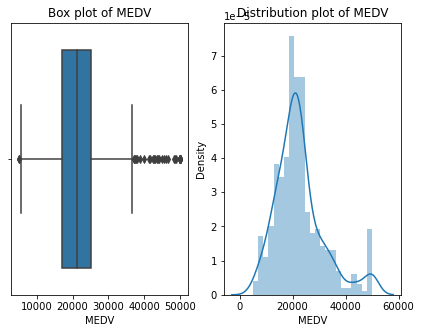

In [12]:
# Analysis of Column MEDV - Median value of owner-occupied homes in $10000's

analysis_column(boston_data.MEDV)

In [13]:
#Drop Columns we do not want to anaylsis below (non-numerical data fields)



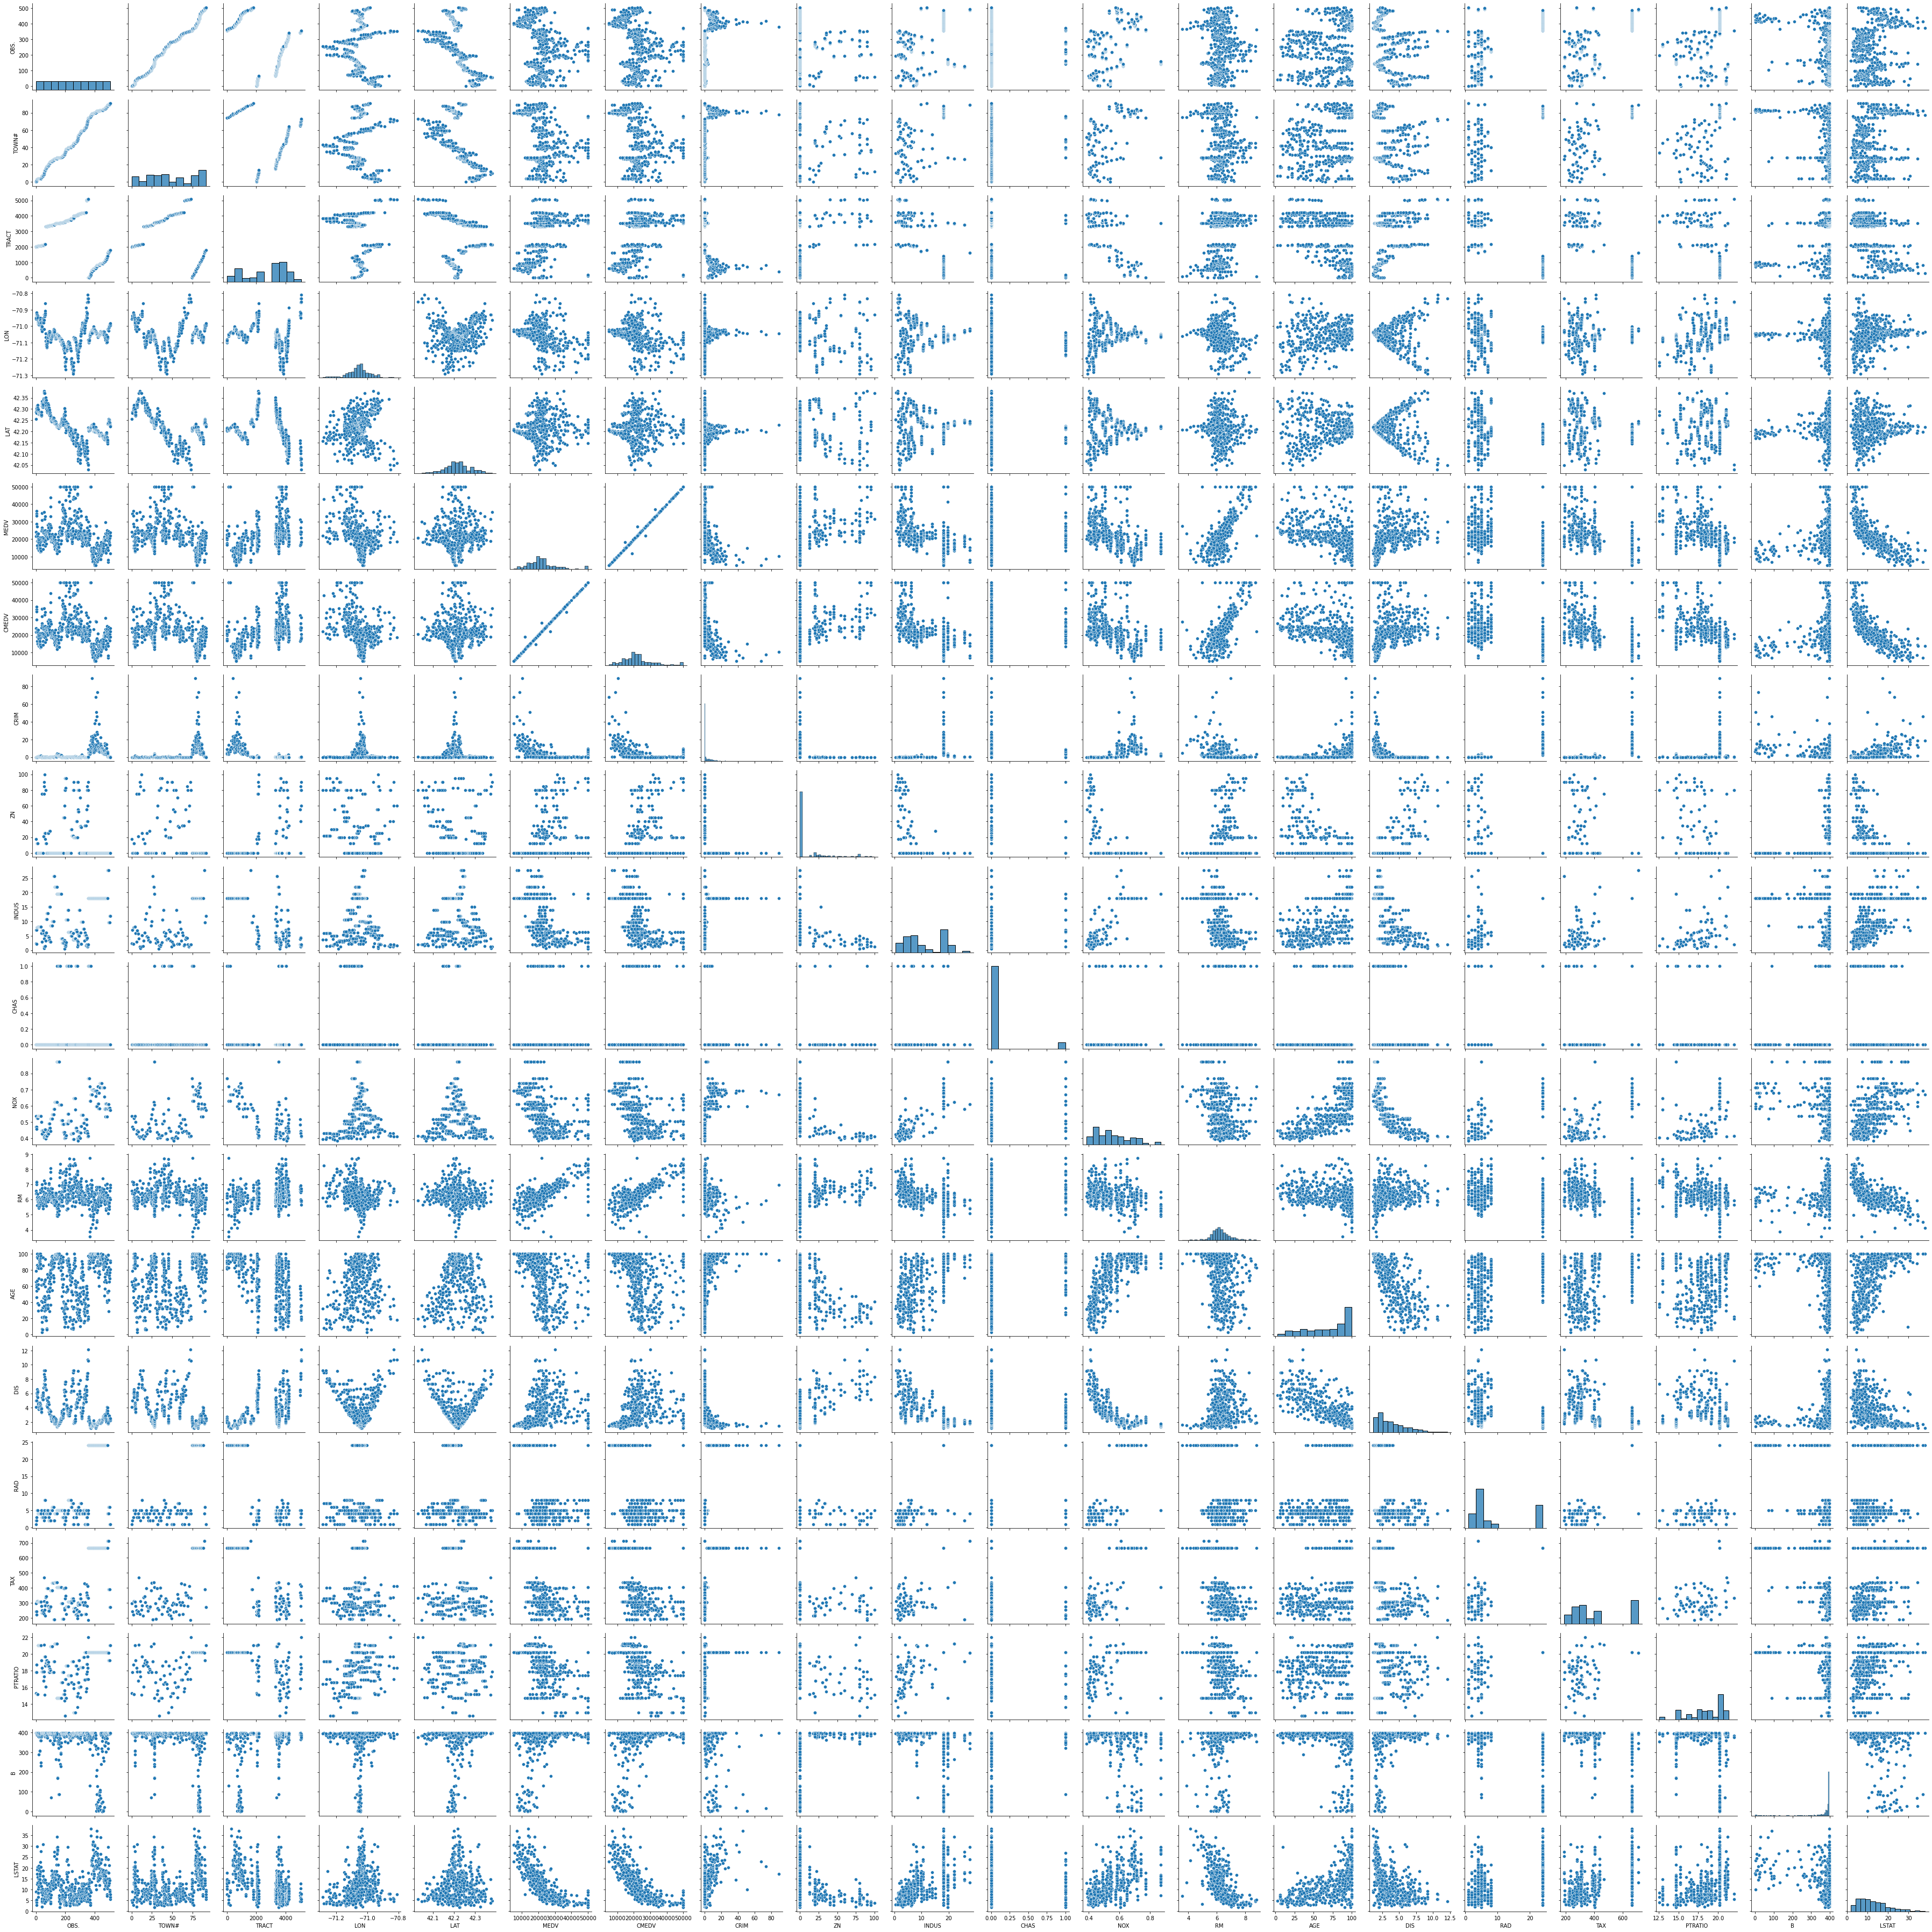

In [14]:
# Calculate and show pairplot of data, looking for visual cues for correlations

%matplotlib inline 

sn.pairplot(boston_data, size=2.5)
plt.tight_layout()

pandas.DataFrame.corr


method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

<AxesSubplot:>

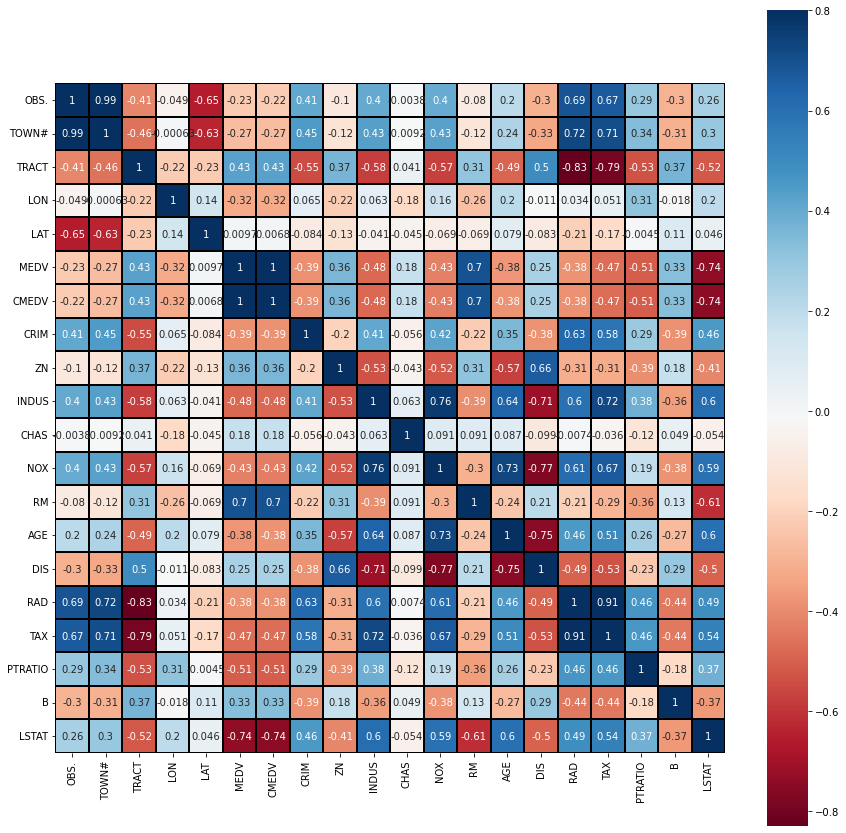

In [28]:
#Heatmap for Pearson standard correlation coefficient

corr=boston_data.corr(method='pearson')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

Positive Standard Correlation >= .7
------------------------------------
MEDV:RM [.7]        | Median value of owner-occupied homes [increases] as average number of rooms per dwelling [increases]
INDUS:NOX [.76]     | nitric oxides concentration [increases] as proportion of non-retail business acres per town [increases]
INDUS:TAX [.72]     | Full-value property-tax rate [increases] as proportion of non-retail business acres per town [increases]
NOX:AGE [.73]       | nitric oxides concentration [increases] as proportion of owner-occupied units built prior to 1940 [increases]
RAD:TAX [.91]       | ull-value property-tax rate [increases] as index of accessibility to radial highways [increases]

Negative Standard Correlation <= -.7
------------------------------------
MEDV:LSTAT [-.74]   | As the % lower status of the population [increases] the median values of owner-occupied homes [decreases]
INDUS:DIS [-.71]    | weighted distances to five Boston employment centres [increases] then the lower proportion of non-retail business acres per town [decreases]
TAX:TRACT [-.79]    | 
NOX:DIS [-.77]      | weighted distances to five Boston employment centres [increases] then nitric oxides concentration [decreases]
DIS:AGE [.-75]      | weighted distances to five Boston employment centres [increases] then proportion of owner-occupied units built prior to 1940 [decreases]
RAD:TRACT [-.83]    | 


<AxesSubplot:>

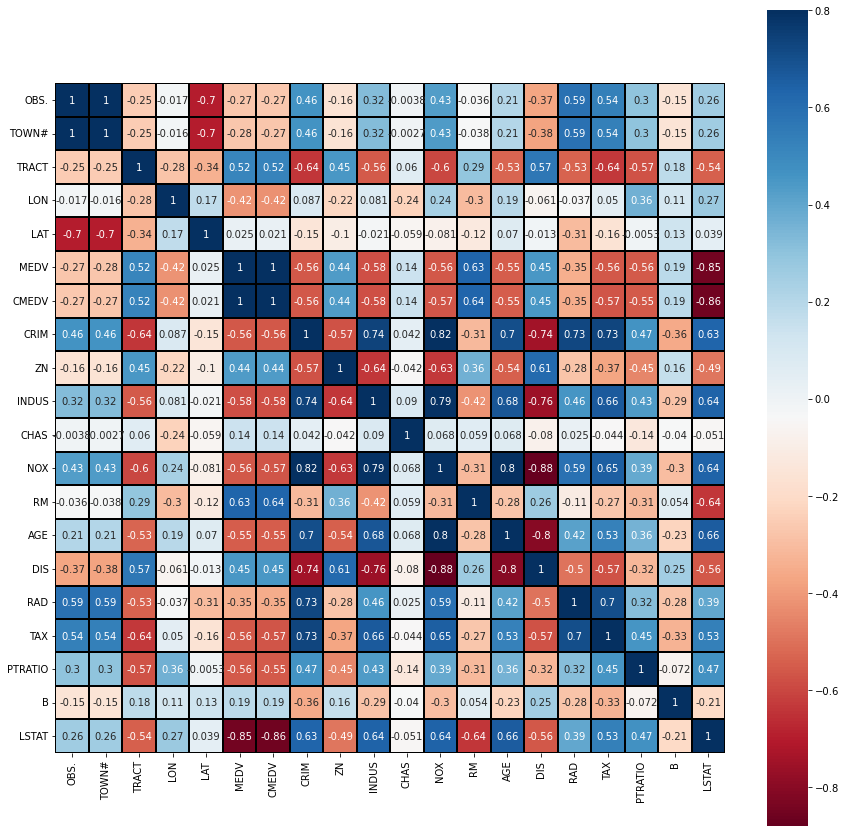

In [29]:
#Heatmap for Spearman rank correlation 

corr=boston_data.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

Rank Correlation >= .7
------------------------------------

CRIM:INDUS [.74]
CRIM:NOX [.82]
CRIM:AGE [.7]
CRIM:RAD [.73]
CRIM:TAX [.73]
INDUS:NOX [.79]
NOX:AGE [.8]
RAD:TAX [.7]

Rank Correlation <= -.7
------------------------------------
MEDV:LSTAT [-.85]
CRIM:DIS [-.74]
INDUS:DIS [-.76]
NOX:DIS [-.88]
DIS:AGE [.-8]


In [ ]:
#Heatmap for Kendall Tau Correlation Coefficient

#corr=boston_data.corr(method='kendall')
#plt.figure(figsize=(15,15))
#sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

In [33]:
#Creating new DF to hold just features that had a +/-0.70 result from either the Pearson or Spearman correlation functions

#MEDV, RM, INDUS, NOX, TAX, AGE, RAD, LSTAT, DIS, TRACT, CRIM

boston_features_df =  boston_data.drop(['OBS.', 'TOWN', 'TOWN#', 'LON', 'LAT', 'ZN', 'CHAS','PTRATIO', 'B'], axis=1)

boston_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TRACT   506 non-null    int64  
 1   MEDV    506 non-null    float64
 2   CMEDV   506 non-null    float64
 3   CRIM    506 non-null    float64
 4   INDUS   506 non-null    float64
 5   NOX     506 non-null    float64
 6   RM      506 non-null    float64
 7   AGE     506 non-null    float64
 8   DIS     506 non-null    float64
 9   RAD     506 non-null    int64  
 10  TAX     506 non-null    int64  
 11  LSTAT   506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


<AxesSubplot:>

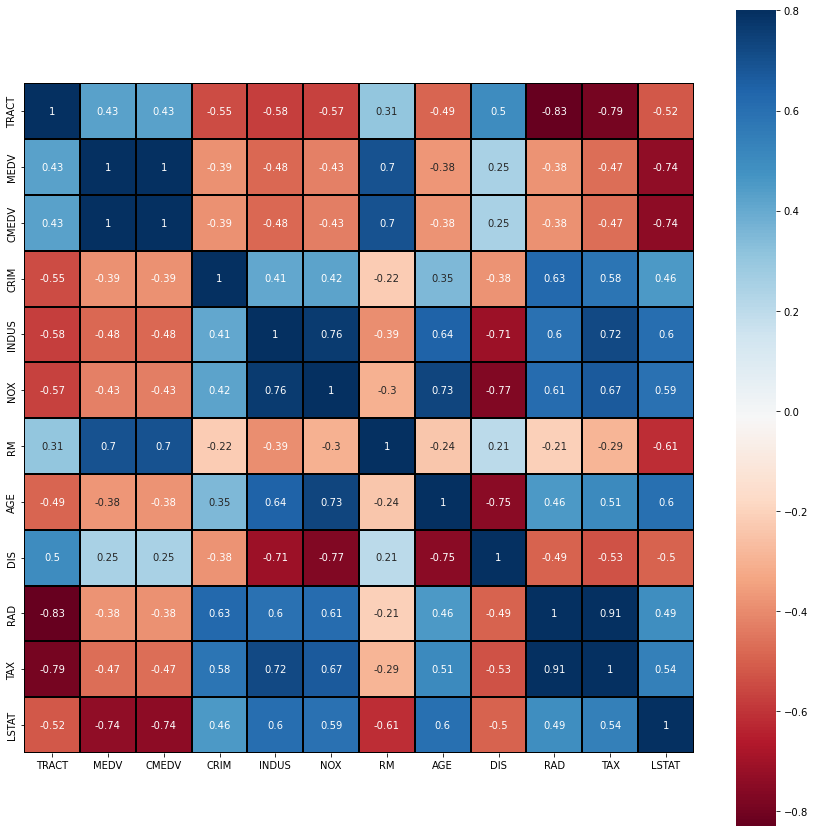

In [34]:
#Run Pearson heatmap again on just the features

corr=boston_features_df.corr(method='pearson')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

<AxesSubplot:>

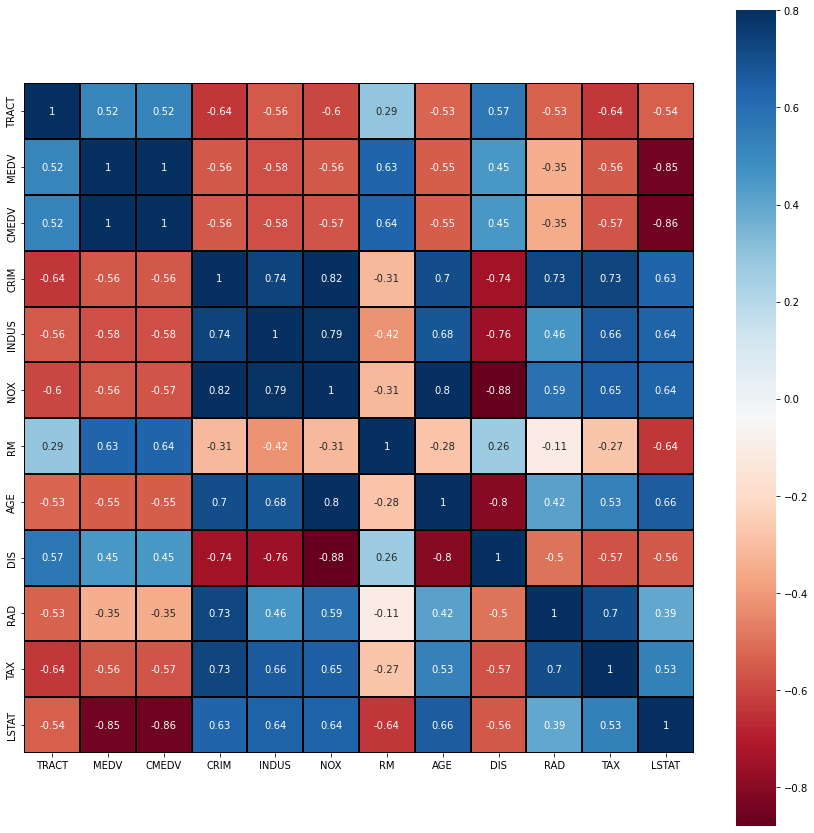

In [35]:
#Run the Spearman heatmap again on just the features

corr=boston_features_df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr, vmax=.8,linewidths=0.01,square=True, annot=True, cmap='RdBu', linecolor='black')

<AxesSubplot:xlabel='MEDV', ylabel='RM'>

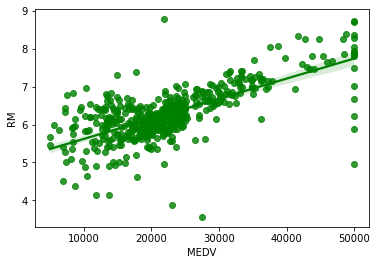

In [36]:
#Run regression plots between independent variables and the target
#
#MEDV:RM [.7] STD

sn.regplot(x=boston_data.MEDV, y=boston_data.RM, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

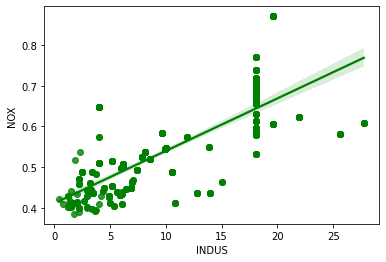

In [37]:
#Run regression plots between independent variables and the target
#
#INDUS:NOX [.76] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.NOX, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='TAX'>

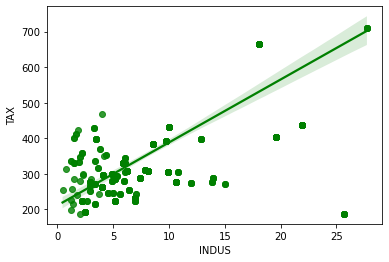

In [38]:
#Run regression plots between independent variables and the target
#
#INDUS:TAX [.72] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.TAX, color='g')

<AxesSubplot:xlabel='NOX', ylabel='AGE'>

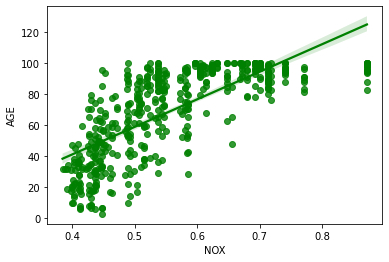

In [39]:
#Run regression plots between independent variables and the target
#
#NOX:AGE [.73] STD

sn.regplot(x=boston_data.NOX, y=boston_data.AGE, color='g')

<AxesSubplot:xlabel='RAD', ylabel='TAX'>

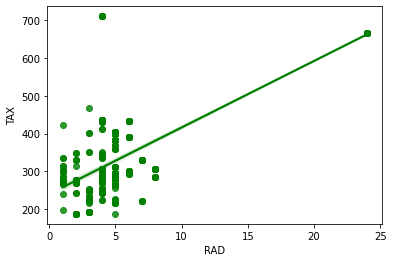

In [40]:
#Run regression plots between independent variables and the target
#
#RAD:TAX [.91] STD

sn.regplot(x=boston_data.RAD, y=boston_data.TAX, color='g')

<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>

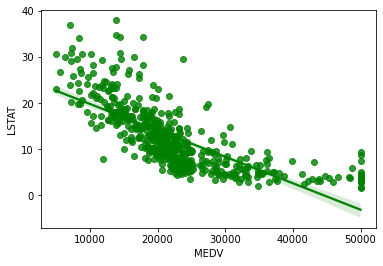

In [41]:
#Run regression plots between independent variables and the target
#
#MEDV:LSTAT [-.74] STD

sn.regplot(x=boston_data.MEDV, y=boston_data.LSTAT, color='g')

<AxesSubplot:xlabel='INDUS', ylabel='DIS'>

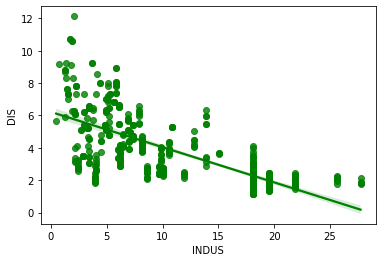

In [42]:
#Run regression plots between independent variables and the target
#
#INDUS:DIS [-.71] STD

sn.regplot(x=boston_data.INDUS, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='TAX', ylabel='TRACT'>

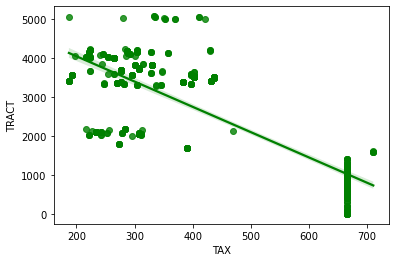

In [43]:
#Run regression plots between independent variables and the target
#
#TAX:TRACT [-.79] STD

sn.regplot(x=boston_data.TAX, y=boston_data.TRACT, color='g')

<AxesSubplot:xlabel='NOX', ylabel='DIS'>

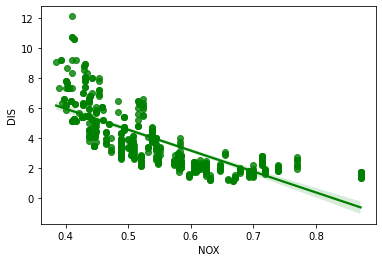

In [44]:
#Run regression plots between independent variables and the target
#
#NOX:DIS [-.77] STD

sn.regplot(x=boston_data.NOX, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='AGE', ylabel='DIS'>

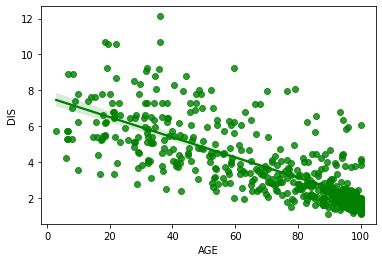

In [46]:
#Run regression plots between independent variables and the target
#
#DIS:AGE [.-75] STD

sn.regplot(x=boston_data.AGE, y=boston_data.DIS, color='g')

<AxesSubplot:xlabel='RAD', ylabel='TRACT'>

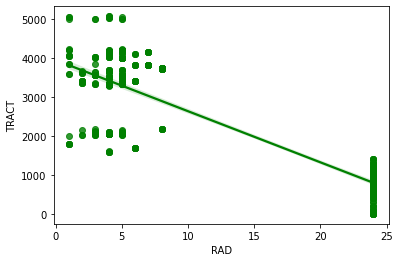

In [47]:
#Run regression plots between independent variables and the target
#
#RAD:TRACT [-.83] STD

sn.regplot(x=boston_data.RAD, y=boston_data.TRACT, color='g')